# Penguin Problem 🐧❄

## 1. Introduction 📖
The caretakers at a local zoo are facing challenges in adequately feeding the penguin population. Ensuring proper nutrition is essential for maintaining the health and well-being of the birds. Understanding how structural features of penguins, such as bill length and flipper length, relate to body mass can help optimize feeding routines and improve overall care.

This project aims to analyze the relationship between penguin body mass and their structural features. By identifying significant correlations, caretakers can develop more efficient feeding strategies tailored to individual penguins based on measurable characteristics.

## 2. Problem Statement 📢
The current feeding regimen for the penguins is not effectively meeting their nutritional needs, leading to potential underfeeding or overfeeding. Since body mass plays a crucial role in determining dietary requirements, understanding the factors influencing it can be beneficial. The primary focus of this study is to determine if structural measurements such as bill length and flipper length can predict body mass, thereby assisting caretakers in managing feeding routines more effectively.

## 3. Data Overview 📈
This study utilizes a dataset containing measurements of different penguins. The key variables included in the dataset are:
- **Species:** Type of penguin (e.g., Adelie, Gentoo)
- **Bill Length:** Length of the penguin’s beak (in mm)
- **Bill Depth:** Depth of the penguin’s beak (in mm)
- **Flipper Length:** Length of the penguin’s wings (in mm)
- **Body Mass:** Weight of the penguin (in grams)
- **Sex:** Gender of the penguin

The dataset provides an opportunity to explore the relationships between these structural features and body mass to determine which attributes contribute significantly to weight variations.

## 4. Objective 🎯
To analyze the relationship between structural features and body mass in penguins to aid in better feeding management.


## 5. Methodology 🔍
- **Exploratory Data Analysis (EDA):**
  - Visualizing distributions, correlations, and patterns within the dataset.
- **Statistical Analysis:**
  - Using correlation analysis to examine relationships between variables.


The results from this analysis will provide valuable insights for caretakers to optimize feeding practices and improve penguin health management.



In [2]:
# importing required libraries

import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
# importing dataset

penguin_data = pd.read_csv('penguins_dataset.csv')

**!  The dataset is already cleaned beforehand.**

### I will use some descriptive statistics funtions to explore the data

In [4]:
penguin_data.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007


In [5]:
penguin_data['species'].value_counts()

species
Adelie    146
Gentoo    119
Name: count, dtype: int64

#### We have two species of penguins "Adelie" and "Gentoo"

In [6]:
penguin_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265 entries, 0 to 264
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            265 non-null    object 
 1   island             265 non-null    object 
 2   bill_length_mm     265 non-null    float64
 3   bill_depth_mm      265 non-null    float64
 4   flipper_length_mm  265 non-null    float64
 5   body_mass_g        265 non-null    float64
 6   sex                265 non-null    object 
 7   year               265 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 16.7+ KB


In [7]:
penguin_data.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,265.000000,265.000000,265.000000,265.000000,265.000000
mean,42.750566,16.842642,202.286792,4328.679245,2008.060377
std,5.214804,2.009775,15.018953,839.748875,0.800175
min,32.100000,13.100000,172.000000,2850.000000,2007.000000
25%,38.600000,15.000000,190.000000,3600.000000,2007.000000
50%,42.000000,17.000000,198.000000,4300.000000,2008.000000
75%,46.800000,18.500000,215.000000,5000.000000,2009.000000
max,59.600000,21.500000,231.000000,6300.000000,2009.000000


### I will create a scatterplot to visualize relationships between pairs of variables.

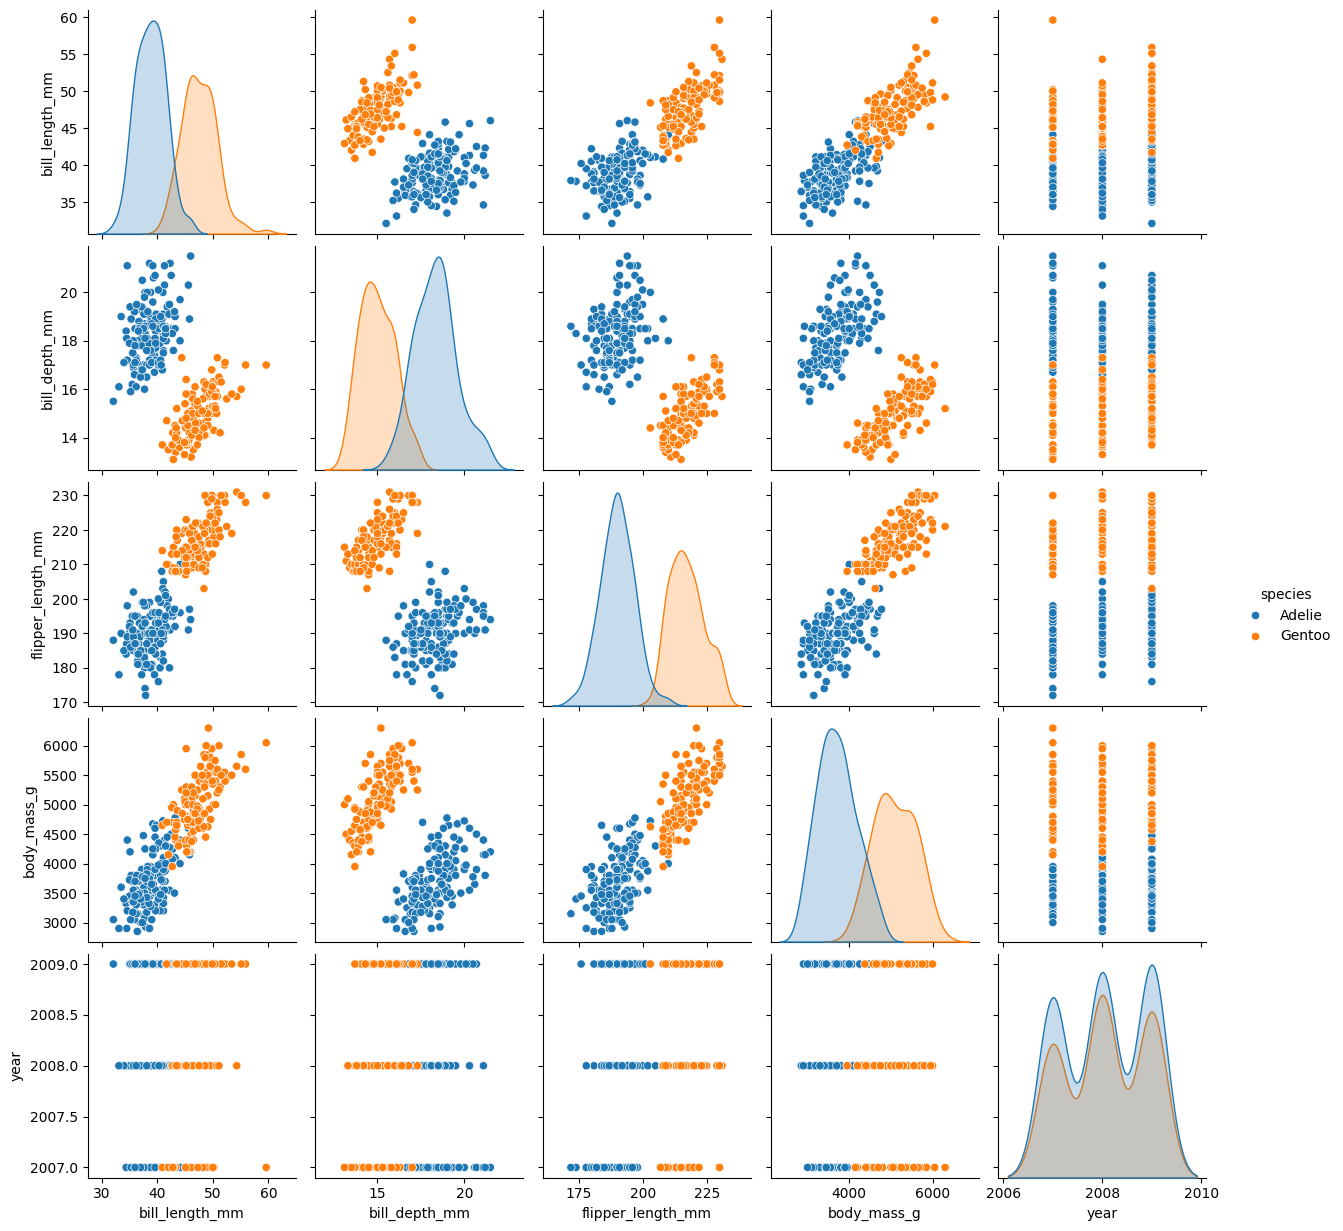

In [8]:
# using seaborn to plot the scatterplot using pairplot function

sns.pairplot(penguin_data, hue='species')

#### From the scatterplot matrix, few linear relationships are observable:

- bill length (mm) and flipper length (mm)
- body mass (g) and bill length (mm)
- body mass (g) and flipper length

#### I will test the following relationships to see if they are statistically true
- body_mass_g and bill_length_mm
- body_mass_g and flipper_length

## Checking Correlation Coefficients
- A correlation coefficient (like Pearson’s r) measures the strength and direction of the linear relationship between two variables.

In [9]:
import scipy.stats as stats

correlation_matrix = penguin_data.corr(numeric_only=True)
print(correlation_matrix['body_mass_g'])

bill_length_mm       0.876786
bill_depth_mm       -0.483227
flipper_length_mm    0.884427
body_mass_g          1.000000
year                 0.005869
Name: body_mass_g, dtype: float64


#### **Significant correlation coefficients with body_mass of penguins** 
- "bill_length_mm" at 0.87  and "flipper_length_mm" at 0.88

#### **Hypothesis Test for Correlations**
- Using Scipy’s pearsonr() to check statistical significance of correlations:

In [10]:
for col in ['bill_length_mm', 'flipper_length_mm']:
    corr, p_value = stats.pearsonr(penguin_data[col], penguin_data['body_mass_g'])
    print(f"Correlation between body_mass_g and {col}: {corr:.3f}, p-value: {p_value:.5f}")


Correlation between body_mass_g and bill_length_mm: 0.877, p-value: 0.00000
Correlation between body_mass_g and flipper_length_mm: 0.884, p-value: 0.00000


### p-value is way smaller than 0.05 or 5%, hence the correlations are statistically significant and truly exists.

## Conclusion ✅
- #### After analyzing the penguin dataset, I found that bill length (bill_length_mm) and flipper length (flipper_length_mm) are significantly related to body mass (body_mass_g). 

- #### Statistical tests confirmed that these relationships are not due to random chance, as indicated by strong correlation values and low p-values from hypothesis testing.

- #### This suggests that caretakers at the zoo can use these measurements to estimate a penguin’s weight and optimize feeding routines accordingly.

- #### By incorporating these insights into feeding schedules, caretakers can ensure that penguins receive the appropriate amount of food, improving both their health and resource management at the zoo.